
## Цены на авиабилеты и их динамика зависят от множества факторов: расстояние, популярность маршрута, время года, количества пересадок, используемого самолёта и других.
### В рамках проекта будет выяснено какие рейсы предпочитают пассажиры, кем преимущественно контролируется рынок, а также сезонность и многое другое.

# 1. Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

print('Библиотеки успешно импортированы')

Библиотеки успешно импортированы


# 2. Загрузка данных

In [9]:
# Загрузка данных
df = pd.read_csv("/Flight_Price_Dataset_of_Bangladesh.csv")

In [14]:
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [16]:
df.dtypes

,0
Airline,object
Source,object
Source Name,object
Destination,object
Destination Name,object
Departure Date & Time,object
Arrival Date & Time,object
Duration (hrs),float64
Stopovers,object
Aircraft Type,object


In [18]:
df.shape

(57000, 17)

# 3. Подготовка данных для работы

Некоторые колонки изначально строковые. Их нужно было изменить в datetime и float, чтобы можно было работать с временем. Также были убраны строки, в которых нет даты вылета или длительности — без них анализ не имеет смысла. Созданы новые признаки в виде «дни недели» или «месяца» для анализа сезонности и частоты рейсов.

In [21]:
df.columns

Index(['Airline', 'Source', 'Source_Name', 'Destination', 'Destination_Name',
       'Departure_Date_&_Time', 'Arrival_Date_&_Time', 'Duration_hrs',
       'Stopovers', 'Aircraft_Type', 'Class', 'Booking_Source',
       'Base_Fare_BDT', 'Tax_&_Surcharge_BDT', 'Total_Fare_BDT', 'Seasonality',
       'Days_Before_Departure'],
      dtype='object')

In [19]:
# Очистка и подготовка колонок
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

In [35]:
# Игнорировать ошибки (преобразует проблемные значения в NaT)
df['Departure_Date_&_Time'] = pd.to_datetime(df['Departure_Date_&_Time'], errors='coerce')
df['Arrival_Date_&_Time'] = pd.to_datetime(df['Arrival_Date_&_Time'], errors='coerce')

# Посмотреть, есть ли некорректные значения
print(f"Некорректные даты вылета: {df['Departure_Date_&_Time'].isna().sum()}")
print(f"Некорректные даты прибытия: {df['Arrival_Date_&_Time'].isna().sum()}")

Некорректные даты вылета: 0
Некорректные даты прибытия: 0


In [38]:
# Новые признаки
df['Month'] = df['Departure_Date_&_Time'].dt.to_period('M').astype(str)
df['Weekday'] = df['Departure_Date_&_Time'].dt.day_name()

# 4 Визуализация

In [46]:
df.columns

Index(['Airline', 'Source', 'Source_Name', 'Destination', 'Destination_Name',
       'Departure_Date_&_Time', 'Arrival_Date_&_Time', 'Duration_hrs',
       'Stopovers', 'Aircraft_Type', 'Class', 'Booking_Source',
       'Base_Fare_BDT', 'Tax_&_Surcharge_BDT', 'Total_Fare_BDT', 'Seasonality',
       'Days_Before_Departure', 'Month', 'Weekday'],
      dtype='object')

In [52]:
df.groupby('Month', as_index=False).size()

,Month,size
0,2025-01,811
1,2025-02,2118
2,2025-03,4033
3,2025-04,4709
4,2025-05,4814
5,2025-06,4702
6,2025-07,4664
7,2025-08,4919
8,2025-09,4715
9,2025-10,4992


In [50]:
df.groupby('Month', as_index = False).agg({'Airline': 'count'})

,Month,Airline
0,2025-01,811
1,2025-02,2118
2,2025-03,4033
3,2025-04,4709
4,2025-05,4814
5,2025-06,4702
6,2025-07,4664
7,2025-08,4919
8,2025-09,4715
9,2025-10,4992


На этой гистрограмме показана количество полётов по всем маршрутам в разные даты.
На основе этого графике можно выделить, что наибольшее количество рейсов приходится на август и октябрь.

In [78]:
result = df.groupby('Month', as_index=False).agg({'Airline': 'count'})
result = result.rename(columns={'Airline': 'Flights_Count'})

# Находим индексы максимума и минимума
max_idx = result['Flights_Count'].idxmax()
min_idx = result['Flights_Count'].idxmin()

# Получаем строки с этими индексами
max_month = result.loc[max_idx]
min_month = result.loc[min_idx]

print(f"Максимум: {max_month['Month']} - {max_month['Flights_Count']} рейсов")
print(f"Минимум: {min_month['Month']} - {min_month['Flights_Count']} рейсов")

Максимум: 2025-10 - 4992 рейсов
Минимум: 2025-01 - 811 рейсов


/tmp/ipython-input-3074381585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='viridis', order=sorted(df['Month'].unique()))


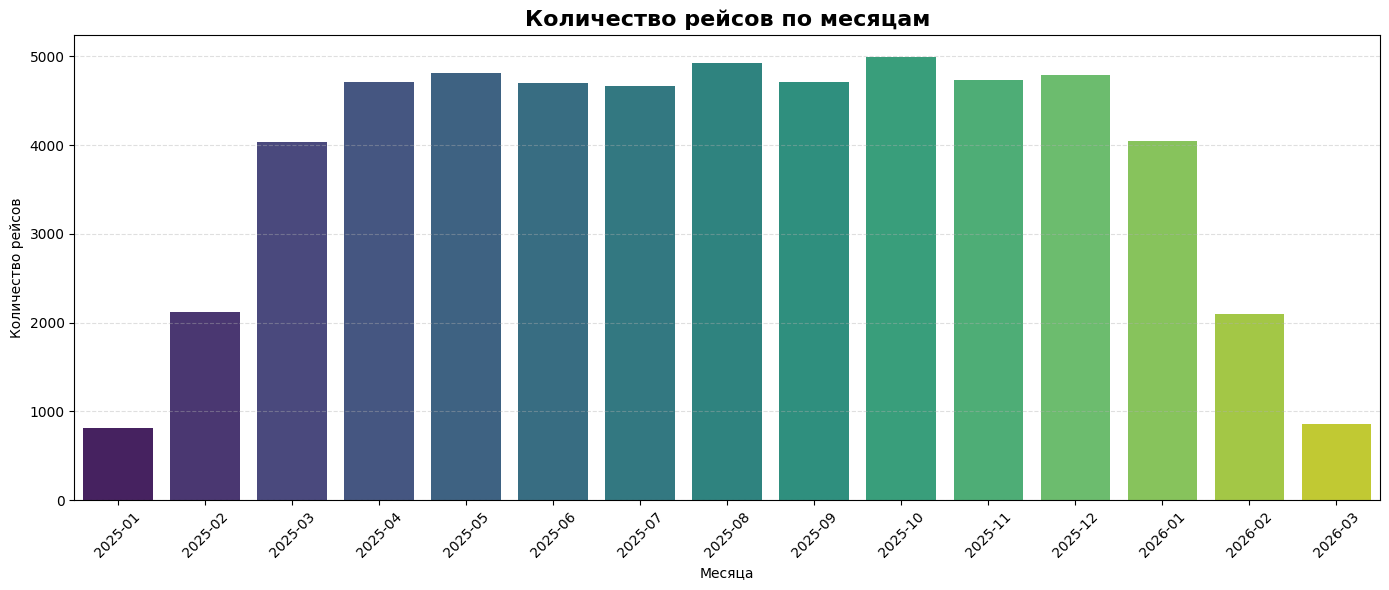

In [72]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Month', palette='viridis', order=sorted(df['Month'].unique()))
plt.title("Количество рейсов по месяцам", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.xlabel("Месяца")
plt.ylabel("Количество рейсов")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [59]:
df.groupby('Aircraft_Type', as_index = False).agg({'Duration_hrs':'mean'})

,Aircraft_Type,Duration_hrs
0,Airbus A320,0.917866
1,Airbus A350,9.900134
2,Boeing 737,3.222035
3,Boeing 777,9.809253
4,Boeing 787,3.223676


В этой гистограмме можно явно заметить, как средняя длительность Airbus A350 и Boeing 777 сильно превосходит со своими 10 часов альтернативные виды воздушного транспорта, как например Boeing 787 примерно 3 часа.

/tmp/ipython-input-580465598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


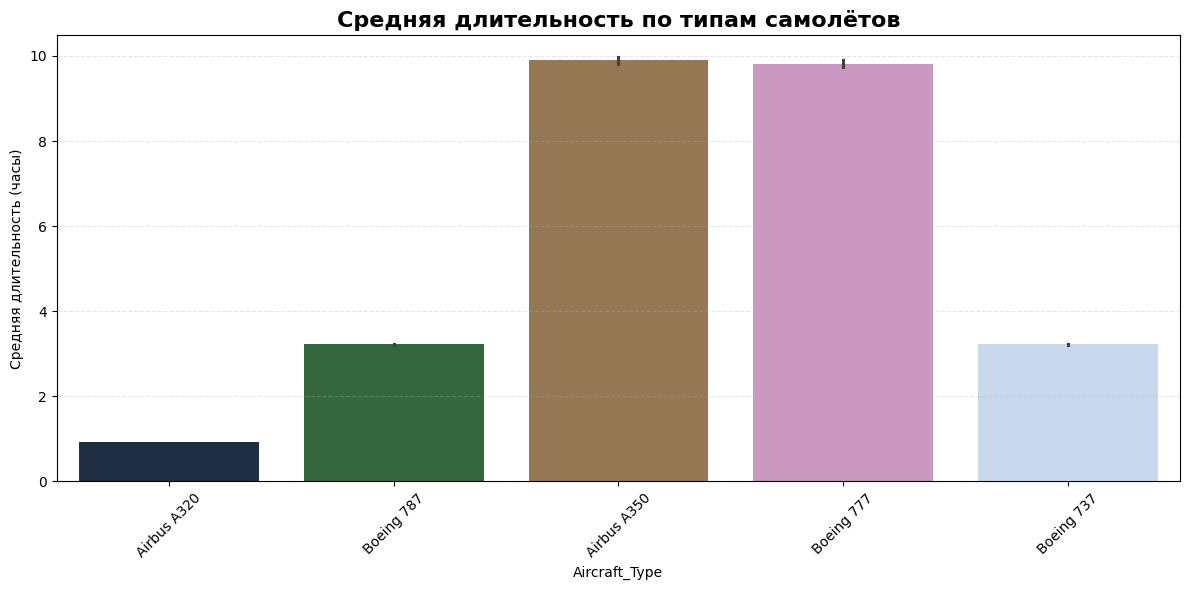

In [71]:
top_aircraft = df['Aircraft_Type'].value_counts().head(8).index
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df[df['Aircraft_Type'].isin(top_aircraft)],
    x='Aircraft_Type',
    y='Duration_hrs',
    palette='cubehelix',
    estimator='mean'
)
plt.title("Средняя длительность по типам самолётов", fontsize=16, weight='bold')
plt.ylabel("Средняя длительность (часы)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


На следующей гистограмме можно увидеть среднюю длительность перелёта. И довольно хороший факт в том, что длительность различных авиакомпаний мало отличается друг от друга, а именно 4 часа. Факт говорит о хорошем, поскольку никто из компаний сильно не отстаёт друг от друга и, вероятно, качественный подход к выбору маршрута полёта схож между ними.

/tmp/ipython-input-2647000019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


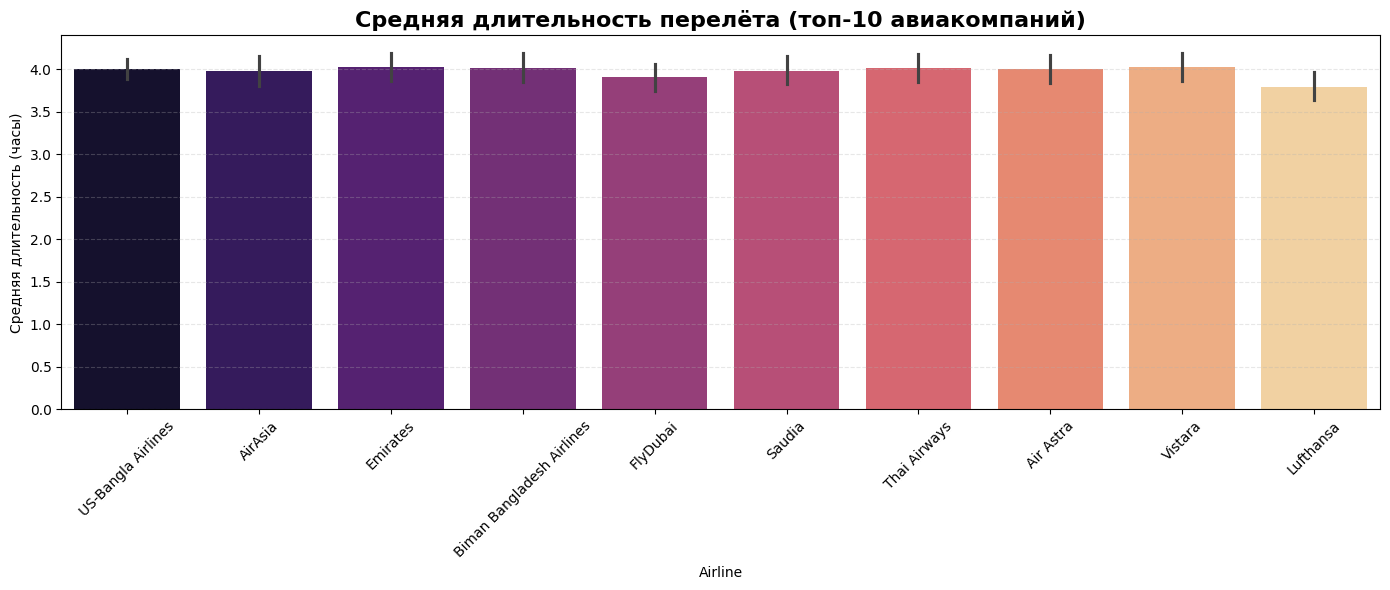

In [70]:
# 2. ✈️ Средняя длительность перелёта по авиакомпаниям
top_airlines = df['Airline'].value_counts().head(10).index
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df[df['Airline'].isin(top_airlines)],
    x='Airline',
    y='Duration_hrs',
    palette='magma',
    estimator='mean'
)
plt.title("Средняя длительность перелёта (топ-10 авиакомпаний)", fontsize=16, weight='bold')
plt.ylabel("Средняя длительность (часы)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


На гистограмме по количеству рейсов по дням недели можно заметить регулярность по количеству рейсов вне зависимости от дня недели, а именно в среднем по 8000 почти каждый день.

/tmp/ipython-input-417671151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekday', order=week_order, palette='coolwarm')


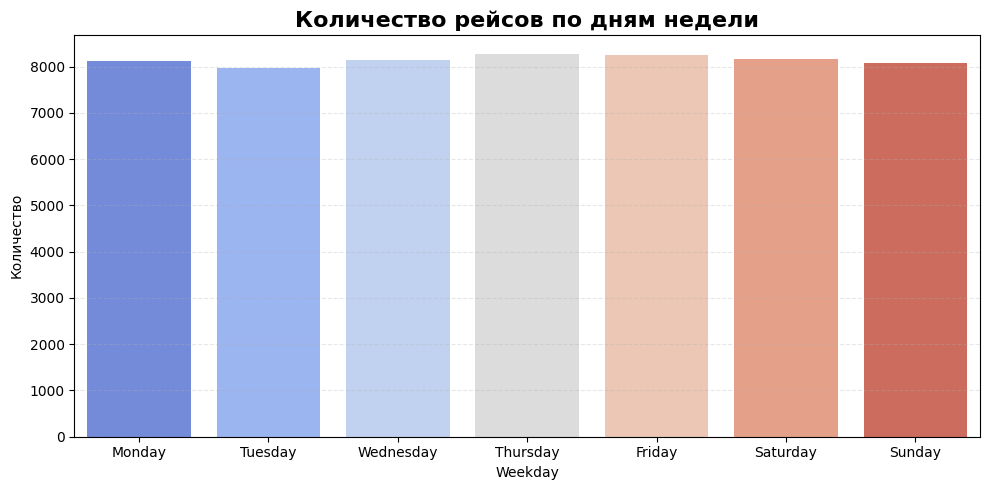

In [69]:
# 4. 📆 Рейсы по дням недели
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weekday', order=week_order, palette='coolwarm')
plt.title("Количество рейсов по дням недели", fontsize=16, weight='bold')
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

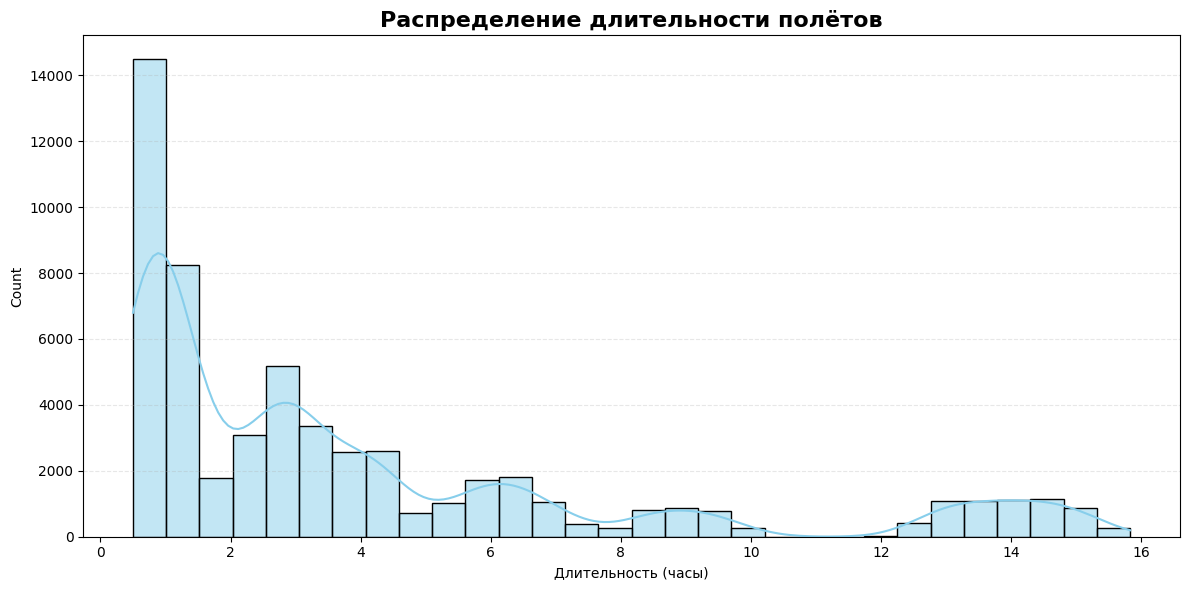

In [68]:

# 5. 🕒 Распределение длительности полётов
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration_hrs'], bins=30, kde=True, color='skyblue')
plt.title("Распределение длительности полётов", fontsize=16, weight='bold')
plt.xlabel("Длительность (часы)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### На графике распределения длительности полётов можно увидеть положительную закономерность, когда полёты с меньшей длительностью (от 1 до 2 часов) ощутимо превышают по количеству длительные полёты (от 4 до 16 часов).